In [1]:
!pip install -qU transformers diffusers accelerate openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 22.0 MB/s eta 0:00:00


In [5]:
from transformers.tools import OpenAiAgent

agent = OpenAiAgent(
    model='gpt-3.5-turbo', api_key='API_KEY'  # platform.openai.com
)

==Explanation from the agent==
I will use the following tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="A cat in armor")


==Result==


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/25 [00:00<?, ?it/s]

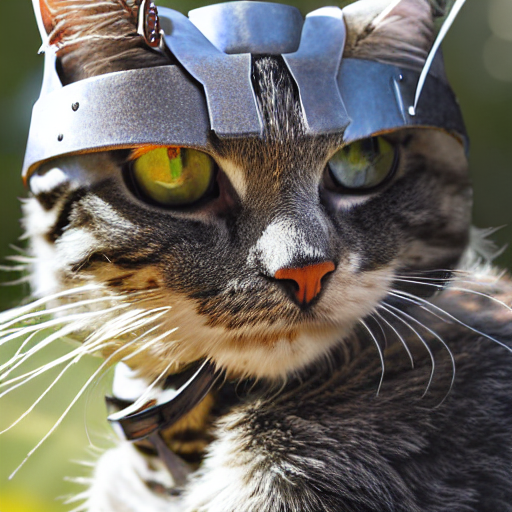

In [6]:
agent.run("Can you generate an image of a cat in armor?")

In [8]:
#Lets create a custom tool
from transformers import Tool

class CircleArea(Tool):
    name = 'circle_area_tool'
    description = (
       ''' This tool returns the are of the circle
       when the radius is given'''
    )
    inputs = ['text']
    outputs = [int]

    def __call__(self, radius: str):
        return 3.14*int(radius)**2
circle_area_tool = CircleArea()

In [9]:
agent = OpenAiAgent(
    model='gpt-3.5-turbo',
    api_key='API_KEY',
    additional_tools=[circle_area_tool]
)

In [10]:
agent.run("what is the area of the circle with radius 4")

==Explanation from the agent==
I will use the following tool: `circle_area_tool` to calculate the area of the circle.


==Code generated by the agent==
radius = 4
area = circle_area_tool(radius)
print(f"The area of the circle with radius {radius} is {area}.")


==Result==
The area of the circle with radius 4 is 50.24.


50.24

In [11]:
from transformers.tools.agents import PreTool

for i, (name, tool) in enumerate(agent.toolbox.items()):
    if type(tool) is PreTool:
        print(f"{i+1}: {name} (PreTool)")
    else:
        print(f"{i+1}: {name} (Tool)")

1: document_qa (PreTool)
2: image_captioner (PreTool)
3: image_qa (PreTool)
4: image_segmenter (PreTool)
5: transcriber (PreTool)
6: summarizer (PreTool)
7: text_classifier (PreTool)
8: text_qa (PreTool)
9: text_reader (PreTool)
10: translator (PreTool)
11: image_transformer (PreTool)
12: text_downloader (PreTool)
13: image_generator (PreTool)
14: video_generator (PreTool)
15: circle_area_tool (Tool)


In [12]:
agent.toolbox

{'document_qa': PreTool(task='document-question-answering', description='This is a tool that answers a question about an document (pdf). It takes an input named `document` which should be the document containing the information, as well as a `question` that is the question about the document. It returns a text that contains the answer to the question.', repo_id=None),
 'image_captioner': PreTool(task='image-captioning', description='This is a tool that generates a description of an image. It takes an input named `image` which should be the image to caption, and returns a text that contains the description in English.', repo_id=None),
 'image_qa': PreTool(task='image-question-answering', description='This is a tool that answers a question about an image. It takes an input named `image` which should be the image containing the information, as well as a `question` which should be the question in English. It returns a text that is the answer to the question.', repo_id=None),
 'image_segmen